In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import model_selection, preprocessing
import xgboost as xgb
import datetime

train_lat_lon = pd.read_csv('/Users/xiechenwei/Downloads/train_lat_lon.csv', parse_dates=['key'])
test_lat_lon = pd.read_csv('/Users/xiechenwei/Downloads/test_lat_lon.csv', parse_dates=['key'])

In [63]:
city = train_lat_lon["key"]

In [64]:
only_cityname = []
for ct in city:
    city_name = ct.split(':')
    ct = city_name[3]
    only_cityname.append(ct)

In [65]:
train_lat_lon["sub_area"] = only_cityname

In [66]:
df_train_ll = train_lat_lon.drop(["key", "id"], axis=1)

In [67]:
cleaned_train_ll = df_train_ll.drop_duplicates()

In [68]:
cleaned_train_ll.head()

,lat,lon,tolerance_m,sub_area
0,55.682829,37.416212,5,Ochakovo-Matveevskoe
18,55.686410,37.415503,5,Ochakovo-Matveevskoe
20,55.885081,37.476452,10,Zapadnoe Degunino
24,55.711356,37.389027,5,Mozhajskoe
25,55.902867,37.609132,5,Bibirevo


In [69]:
grouped = cleaned_train_ll.groupby(cleaned_train_ll['sub_area'])

In [70]:
train_city_ll = grouped.mean()

In [71]:
city_groupby_name = pd.DataFrame({'sub_area': train_city_ll.index, 'lat':train_city_ll["lat"].values, 'lon':train_city_ll["lon"].values})

In [72]:
city_groupby_name

,lat,lon,sub_area
0,55.803657,37.539165,Ajeroport
1,55.687830,37.577288,Akademicheskoe
2,55.815090,37.650540,Alekseevskoe
3,55.878715,37.581694,Altuf'evskoe
4,55.750406,37.584449,Arbat
5,55.866225,37.666515,Babushkinskoe
6,55.767775,37.672403,Basmannoe
7,55.784337,37.571081,Begovoe
8,55.866350,37.553491,Beskudnikovskoe
9,55.893570,37.609459,Bibirevo


In [73]:
train_m = pd.read_csv('/Users/xiechenwei/Downloads/train.csv', parse_dates=['timestamp'])
merge_city_price = pd.merge(train_m, city_groupby_name, on = "sub_area", how = 'left')


In [74]:
grouped_merge_city_price = merge_city_price.groupby(merge_city_price['sub_area'])

In [75]:
grouped_merge_city_price_mean = grouped_merge_city_price.mean()

In [76]:
city_lat_lon_price = pd.DataFrame({'sub_area': grouped_merge_city_price_mean.index, 'lat':grouped_merge_city_price_mean["lat"].values, 
                                   'lon':grouped_merge_city_price_mean["lon"].values,
                                  'price_doc_mean':grouped_merge_city_price_mean["price_doc"].values})


In [77]:
city_lat_lon_price

,lat,lon,price_doc_mean,sub_area
0,55.803657,37.539165,9.888950e+06,Ajeroport
1,55.687830,37.577288,1.057576e+07,Akademicheskoe
2,55.815090,37.650540,8.978796e+06,Alekseevskoe
3,55.878715,37.581694,5.516202e+06,Altuf'evskoe
4,55.750406,37.584449,1.579480e+07,Arbat
5,55.866225,37.666515,7.637642e+06,Babushkinskoe
6,55.767775,37.672403,1.158772e+07,Basmannoe
7,55.784337,37.571081,1.062361e+07,Begovoe
8,55.866350,37.553491,6.770565e+06,Beskudnikovskoe
9,55.893570,37.609459,6.670177e+06,Bibirevo


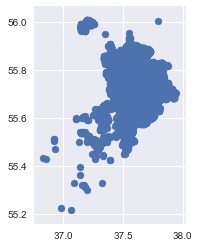

In [106]:
plt.subplot(121)
plt.scatter(cleaned_train_ll['lon'],cleaned_train_ll['lat'])

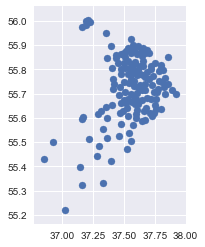

In [107]:
plt.subplot(121)
plt.scatter(city_groupby_name['lon'],city_groupby_name['lat'])

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans

km = KMeans(n_clusters=15, init='k-means++', max_iter=300, n_init=11,verbose=False)
train_k = city_lat_lon_price.drop(['sub_area'], axis = 1)
train_k['price_doc_mean'] = train_k['price_doc_mean']/100000
km.fit(train_k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=11, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)

In [109]:

city_groupby_name['km_lat_lon_price'] = km.predict(train_k)

In [110]:
city_groupby_name

,lat,lon,sub_area,km_lat_lon_price
0,55.803657,37.539165,Ajeroport,11
1,55.687830,37.577288,Akademicheskoe,11
2,55.815090,37.650540,Alekseevskoe,1
3,55.878715,37.581694,Altuf'evskoe,7
4,55.750406,37.584449,Arbat,4
5,55.866225,37.666515,Babushkinskoe,9
6,55.767775,37.672403,Basmannoe,6
7,55.784337,37.571081,Begovoe,11
8,55.866350,37.553491,Beskudnikovskoe,3
9,55.893570,37.609459,Bibirevo,3


In [111]:
city_groupby_km_lat = city_groupby_name.drop(['km_lat_lon' ], axis = 1)
#city_groupby_km_lat_price = city_groupby_name
city_groupby_km_lat.head()

ValueError: labels ['km_lat_lon'] not contained in axis

In [112]:
km0 = city_groupby_name[city_groupby_name.km_lat_lon_price == 0].index
km1 = city_groupby_name[city_groupby_name.km_lat_lon_price == 1].index
km2 = city_groupby_name[city_groupby_name.km_lat_lon_price == 2].index
km3 = city_groupby_name[city_groupby_name.km_lat_lon_price == 3].index
km4 = city_groupby_name[city_groupby_name.km_lat_lon_price == 4].index
km5 = city_groupby_name[city_groupby_name.km_lat_lon_price == 5].index
km6 = city_groupby_name[city_groupby_name.km_lat_lon_price == 6].index
km7 = city_groupby_name[city_groupby_name.km_lat_lon_price == 7].index
km8 = city_groupby_name[city_groupby_name.km_lat_lon_price == 8].index
km9 = city_groupby_name[city_groupby_name.km_lat_lon_price == 9].index
km10 = city_groupby_name[city_groupby_name.km_lat_lon_price == 10].index
km11 = city_groupby_name[city_groupby_name.km_lat_lon_price == 11].index
km12 = city_groupby_name[city_groupby_name.km_lat_lon_price == 12].index
km13 = city_groupby_name[city_groupby_name.km_lat_lon_price == 13].index
km14 = city_groupby_name[city_groupby_name.km_lat_lon_price == 14].index

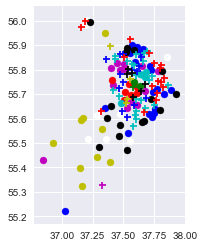

In [113]:
f1 = plt.figure(1)
#print(test['price_doc'])
plt.subplot(121)
plt.scatter(city_groupby_name.ix[km0,'lon'],city_groupby_name.ix[km0, 'lat'], color = 'w')
plt.scatter(city_groupby_name.ix[km1,'lon'],city_groupby_name.ix[km1, 'lat'], color = 'm')
plt.scatter(city_groupby_name.ix[km2,'lon'],city_groupby_name.ix[km2, 'lat'], color = 'r')
plt.scatter(city_groupby_name.ix[km3,'lon'],city_groupby_name.ix[km3, 'lat'], color = 'b')
plt.scatter(city_groupby_name.ix[km4,'lon'],city_groupby_name.ix[km4, 'lat'], color = 'g')
plt.scatter(city_groupby_name.ix[km5,'lon'],city_groupby_name.ix[km5, 'lat'], color = 'y')
plt.scatter(city_groupby_name.ix[km6,'lon'],city_groupby_name.ix[km6, 'lat'], color = 'c')
plt.scatter(city_groupby_name.ix[km7,'lon'],city_groupby_name.ix[km7, 'lat'], color = 'k')
plt.scatter(city_groupby_name.ix[km8,'lon'],city_groupby_name.ix[km8, 'lat'], marker = '+', color = 'g')
plt.scatter(city_groupby_name.ix[km9,'lon'],city_groupby_name.ix[km9, 'lat'], marker = '+', color = 'c')
plt.scatter(city_groupby_name.ix[km10,'lon'],city_groupby_name.ix[km10, 'lat'], marker = '+', color = 'b')
plt.scatter(city_groupby_name.ix[km11,'lon'],city_groupby_name.ix[km11, 'lat'], marker = '+',color = 'k')
plt.scatter(city_groupby_name.ix[km12,'lon'],city_groupby_name.ix[km12, 'lat'], marker = '+', color = 'm')
plt.scatter(city_groupby_name.ix[km13,'lon'],city_groupby_name.ix[km13, 'lat'], marker = '+', color = 'r')
plt.scatter(city_groupby_name.ix[km14,'lon'],city_groupby_name.ix[km14, 'lat'], marker = '+', color = 'y')

In [86]:
train = pd.read_csv('/Users/xiechenwei/Downloads/train.csv', parse_dates=['timestamp'])
test = pd.read_csv('/Users/xiechenwei/Downloads/test.csv', parse_dates=['timestamp'])

In [87]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [88]:
test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [98]:
#train = train.drop(['average_price'], axis = 1)
train_merge_kmeans = pd.merge(train, city_groupby_name, on = "sub_area", how = 'left')
test_merge_kmeans = pd.merge(test, city_groupby_name, on = "sub_area", how = 'left')

In [99]:
mat = train_merge_kmeans['price_doc'] / 100

In [100]:
import math
for i in range(mat.shape[0]):
    mat[i] = math.log10(mat[i])


In [101]:
mat

0        4.767156
1        4.778151
2        4.755875
3        5.117271
4        5.213025
5        4.959041
6        4.740363
7        4.301030
8        4.724276
9        4.301030
10       4.667453
11       4.681241
12       4.707570
13       4.716003
14       4.698970
15       4.267172
16       4.799341
17       4.770852
18       4.897627
19       4.716003
20       4.913814
21       4.716003
22       4.795880
23       4.759668
24       4.778151
25       4.021189
26       4.698970
27       4.672098
28       4.916686
29       4.770852
           ...   
30441    5.398622
30442    4.638489
30443    4.878948
30444    5.058386
30445    5.006011
30446    4.787134
30447    4.804366
30448    4.838102
30449    4.965091
30450    5.100715
30451    4.379179
30452    4.832509
30453    4.609246
30454    4.799341
30455    4.954964
30456    4.000000
30457    4.892095
30458    4.804192
30459    4.761845
30460    4.977724
30461    4.698970
30462    5.023008
30463    5.079181
30464    5.011232
30465    4

In [102]:
train_merge_kmeans.to_csv('/Users/xiechenwei/Desktop/数据挖掘结果/train_wity_kmeans.csv', index=False)
test_merge_kmeans.to_csv('/Users/xiechenwei/Desktop/数据挖掘结果/test_wity_kmeans.csv', index=False)

In [103]:
city_groupby_name

,lat,lon,sub_area,km_lat_lon_price
0,55.803657,37.539165,Ajeroport,11
1,55.687830,37.577288,Akademicheskoe,6
2,55.815090,37.650540,Alekseevskoe,4
3,55.878715,37.581694,Altuf'evskoe,14
4,55.750406,37.584449,Arbat,5
5,55.866225,37.666515,Babushkinskoe,1
6,55.767775,37.672403,Basmannoe,12
7,55.784337,37.571081,Begovoe,6
8,55.866350,37.553491,Beskudnikovskoe,9
9,55.893570,37.609459,Bibirevo,9


In [104]:
train_merge_kmeans['lat']

0        55.893570
1        55.682489
2        55.706342
3        55.844621
4        55.767775
5        55.733898
6        55.790305
7        55.893570
8        55.833226
9        55.737995
10       55.715532
11       55.873483
12       55.737995
13       55.761552
14       55.758848
15       55.654032
16       55.705326
17       55.656854
18       55.715532
19       55.818828
20       55.613707
21       55.844362
22       55.857045
23       55.614683
24       55.844362
25       55.726071
26       55.864162
27       55.644542
28       55.813008
29       55.867753
           ...    
30441    55.777580
30442    55.527057
30443    55.651737
30444    55.844621
30445    55.747813
30446    55.573341
30447    55.651737
30448    55.600426
30449    55.747813
30450    55.864162
30451    55.500527
30452    55.692872
30453    55.539175
30454    55.813008
30455    55.629504
30456    55.844621
30457    55.867753
30458    55.600426
30459    55.651737
30460    55.605444
30461    55.661612
30462    55.

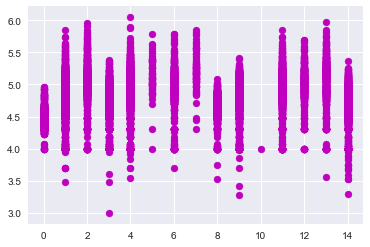

In [114]:
import scipy.io as sio  
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
f1 = plt.figure(1)
#print(test['price_doc'])
#plt.subplot( projection='3d')
#plt.scatter(train_merge_kmeans['lat'],train_merge_kmeans['lon'], train_merge_kmeans['price_doc'] / 1000000, color = 'm')
plt.scatter(train_merge_kmeans['km_lat_lon_price'], mat , color = 'm')



#plot(city_groupby_name['lat'], city_groupby_name['lon'])

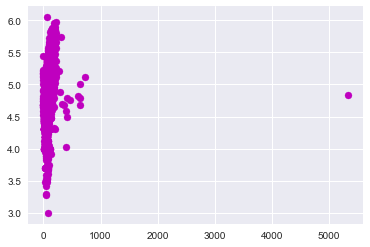

In [97]:
plt.scatter(train_merge_kmeans['full_sq'].astype(float),  mat , color = 'm')